In [2]:
import numpy as np
import sys, io
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
from sklearn.linear_model import SGDClassifier
from sklearn.decomposition import PCA

In [3]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata("MNIST original")

In [4]:
X, Y = mnist.data, mnist.target

X, Y = shuffle(X, Y)

pca = PCA(svd_solver="arpack", n_components=32)

X = pca.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=1/7,
                                                    random_state=None)

X_train = X_train.astype("float") / 255 * 2 - 1
X_test = X_test.astype("float") / 255 * 2 - 1

# X_train = mnist.data[:60000]
# Y_train = mnist.target[:60000]

# X_test = mnist.data[60000:]
# Y_test = mnist.target[60000:]
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 32)
(60000,)
(10000, 32)
(10000,)


In [5]:
C = 1.0
old_stdout = sys.stdout
sys.stdout = mystdout = io.StringIO()

model = SGDClassifier(alpha=0.0001, max_iter=100, verbose=True)
model.fit(X_train, Y_train)

sys.stdout = old_stdout

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   12.8s finished


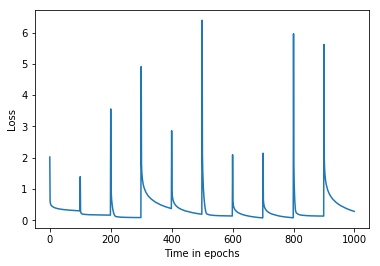

In [6]:
loss_history = mystdout.getvalue()
loss_list = []
for line in loss_history.split('\n'):
    if(len(line.split("loss: ")) == 1):
        continue
    loss_list.append(float(line.split("loss: ")[-1]))
plt.figure()
plt.plot(np.arange(len(loss_list)), loss_list)
plt.xlabel("Time in epochs")
plt.ylabel("Loss")
plt.show()

In [7]:
model2 = svm.SVC(probability=False, kernel="rbf", C=2.8, gamma=.0073)
model2.fit(X_train, Y_train)

SVC(C=2.8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0073, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
def calcAcc(predict, real):
    correct = 0
    for i in range(real.shape[0]):
        if predict[i] == real[i]:
            correct += 1
    return correct / real.shape[0]

In [9]:
P = model.predict(X_train)
print("Train Accuraccy: ", calcAcc(P, Y_train))
P = model.predict(X_test)
print("Test Accuraccy: ", calcAcc(P, Y_test))

Train Accuraccy:  0.8596833333333334
Test Accuraccy:  0.8646


In [10]:
P2 = model.predict(X_train)
print("Train Accuraccy: ", calcAcc(P2, Y_train))
P2 = model2.predict(X_test)
print("Test Accuraccy: ", calcAcc(P2, Y_test))

Train Accuraccy:  0.8596833333333334
Test Accuraccy:  0.985
